<a href="https://colab.research.google.com/github/ShubhamPashilkar/Air_bnb_Capstone_project1/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
url='https://drive.google.com/file/d/1ioU5r9KEYSfwgfUi22SclVkx4l1a_8ou/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
air_bnb = pd.read_csv(url)

In [ ]:
air_bnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
air_bnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
air_bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
air_bnb.shape

(48895, 16)

In [ ]:
air_bnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
air_bnb.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
air_bnb['name'].fillna('No name', inplace= True)
air_bnb['host_name'].fillna('No name', inplace= True)

In [ ]:
air_bnb.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# Removed columns with maximum number of null values
air_bnb.drop(['reviews_per_month'], axis=1, inplace= True)
air_bnb.drop(['last_review'], axis=1, inplace= True)

In [165]:
## Q1 Check availability of room type according to average price.
room_price= air_bnb.groupby(['room_type','availability_365'])['price'].mean().reset_index()
room_price= room_price.sort_values('price', ascending= False).head(5)
room_price

,room_type,availability_365,price
892,Shared room,269,800.000000
877,Shared room,220,800.000000
851,Shared room,173,645.000000
150,Entire home/apt,150,547.263158
180,Entire home/apt,180,501.203125


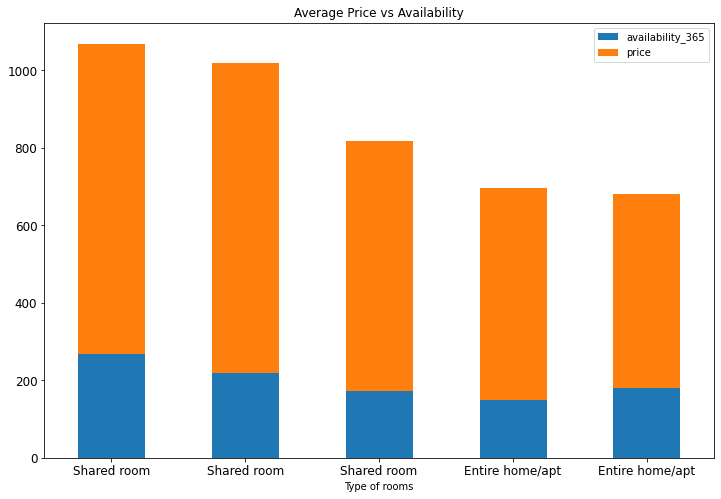

In [230]:
room_price.plot.bar(x='room_type', rot=0, stacked= True, xlabel= 'Type of rooms', title= 'Average Price vs Availability', figsize= (12,8), fontsize= 'large');

In [182]:
## Q2 Which property is more preferred by the guests?
preference= air_bnb.groupby(['name','neighbourhood_group','neighbourhood'])['number_of_reviews'].count().reset_index()
preference= preference.sort_values('number_of_reviews', ascending= False).head(15)
preference

,name,neighbourhood_group,neighbourhood,number_of_reviews
22297,Hillside Hotel,Queens,Jamaica,12
26000,Loft Suite @ The Box House Hotel,Brooklyn,Greenpoint,11
4598,Artsy Private BR in Fort Greene Cumberland,Brooklyn,Fort Greene,10
34718,Private room in Williamsburg,Brooklyn,Williamsburg,7
46346,West Village Apartment,Manhattan,West Village,6
23340,IN MINT CONDITION-STUDIOS EAST 44TH/UNITED NAT...,Manhattan,Midtown,6
22296,Hillside Hotel,Queens,Briarwood,6
14858,Cozy East Village Apartment,Manhattan,East Village,6
18263,East Village Apartment,Manhattan,East Village,5
36838,Room in the heart of Williamsburg,Brooklyn,Williamsburg,5


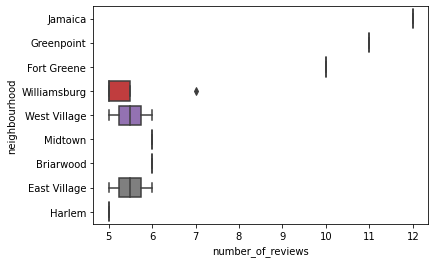

In [199]:
sns.boxplot(x='number_of_reviews', y='neighbourhood', data=preference);

In [232]:
## Q3 In which areas the most of the business is done?
list1= air_bnb.loc[0:,['number_of_reviews','neighbourhood_group']]
dict_1= list1.set_index('number_of_reviews').T.to_dict('list')
final_dict=[]
for i,j in dict_1.items():
  if i>0:
    final_dict.append(j)

unique_neigh=()
for item in final_dict:
    unique_neigh = list(set(unique_neigh) | set(item))
unique_neigh


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  This is separate from the ipykernel package so we can avoid doing imports until


['Bronx', 'Brooklyn', 'Queens', 'Manhattan', 'Staten Island']

In [ ]:
# Observation done: ['Bronx', 'Brooklyn', 'Queens', 'Manhattan', 'Staten Island'] has most reviews and hence there is need of business improvement in other remaining areas.

In [234]:
## Q4. What are the type of rooms and What are their average prices?
room_types_uni = air_bnb['room_type'].unique()
for i in room_types_uni:
    avg_price = round(np.mean(air_bnb['price'][air_bnb['room_type']==i],0))
    print(f'The median price of a {i} is {avg_price}')


The median price of a Private room is 90
The median price of a Entire home/apt is 212
The median price of a Shared room is 70


In [ ]:
## So mainly there are 3 types of rooms and home/apt has the highest average price. 

In [237]:
##Asked Q1. What can we learn about different hosts and areas?
hosts_areas= air_bnb.groupby(['host_name', 'neighbourhood_group','neighbourhood'])['calculated_host_listings_count'].count().reset_index()
hosts_areas= hosts_areas.sort_values('calculated_host_listings_count', ascending= False).head(10)
hosts_areas

,host_name,neighbourhood_group,neighbourhood,calculated_host_listings_count
25278,Sonder (NYC),Manhattan,Financial District,218
13243,John,Manhattan,Hell's Kitchen,55
27598,Vida,Brooklyn,Greenpoint,52
25273,Sonder,Manhattan,Financial District,51
25281,Sonder (NYC),Manhattan,Murray Hill,50
25487,Stanley,Manhattan,Murray Hill,50
22608,Red Awning,Manhattan,Midtown,49
14282,Kara,Manhattan,Hell's Kitchen,41
19077,Michael,Brooklyn,Williamsburg,41
18874,Melissa,Brooklyn,Bedford-Stuyvesant,39


In [ ]:
## Hosts such as Sonder (NYC), John, Vida are busy in the area of Manhattan and Brooklyn.

In [229]:
##Asked Q2. What can we learn from predictions? (ex: locations, prices, reviews, etc)
predictions= air_bnb.groupby(['latitude','longitude','neighbourhood','price'])['number_of_reviews'].count().reset_index()
predictions.sort_values('price', ascending= False).head(5)

,latitude,longitude,neighbourhood,price,number_of_reviews
38522,40.76810,-73.91651,Astoria,10000,1
27860,40.73260,-73.95739,Greenpoint,10000,1
39324,40.77213,-73.98665,Upper West Side,10000,1
23108,40.71980,-73.98566,Lower East Side,9999,1
20437,40.71355,-73.98507,Lower East Side,9999,1


In [210]:
pred.sort_values('number_of_reviews', ascending= False).head(5)

,latitude,longitude,neighbourhood,price,number_of_reviews
23785,40.72145,-73.97881,East Village,75,2
19829,40.71232,-73.94220,Williamsburg,170,2
0,40.49979,-74.24084,Tottenville,110,1
32598,40.74923,-73.95031,Long Island City,125,1
32590,40.74921,-73.97395,Murray Hill,308,1


In [211]:
##Asked Q3. Which hosts are the busiest and why?
busy_hosts= air_bnb.groupby('host_name')['minimum_nights'].count().reset_index()
busy_hosts= busy_hosts.sort_values('minimum_nights', ascending= False).head(10)
busy_hosts

,host_name,minimum_nights
7135,Michael,417
2376,David,403
9782,Sonder (NYC),327
4989,John,294
314,Alex,279
1356,Blueground,232
9214,Sarah,227
2277,Daniel,226
4840,Jessica,205
6684,Maria,204


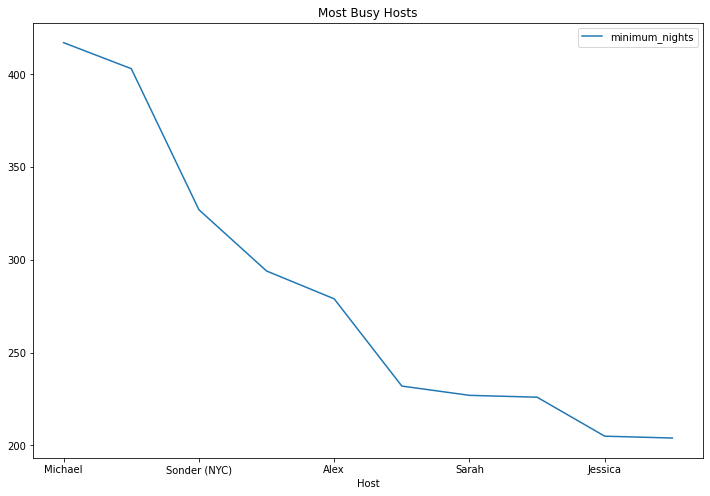

In [217]:
busy_hosts.plot(x='host_name',y='minimum_nights', figsize=(12,8), xlabel='Host', title= 'Most Busy Hosts');

In [ ]:
## It is clear that the most busy hosts are Micheal, Sonder(NYC), Alex, sarah and Jessica as the they have the highest number of night stay counts.

In [236]:
##Asked Q4. Is there any noticeable difference of traffic among different areas and what could be the reason for it?
traffic= air_bnb.groupby(['neighbourhood_group','neighbourhood','room_type','price'])['minimum_nights'].count().reset_index()
traffic.sort_values('minimum_nights', ascending= False).head(10)

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights
1801,Brooklyn,Bushwick,Private room,50,194
1133,Brooklyn,Bedford-Stuyvesant,Private room,50,172
1143,Brooklyn,Bedford-Stuyvesant,Private room,60,162
5224,Brooklyn,Williamsburg,Private room,60,159
5244,Brooklyn,Williamsburg,Private room,80,130
5070,Brooklyn,Williamsburg,Entire home/apt,200,130
5239,Brooklyn,Williamsburg,Private room,75,129
5026,Brooklyn,Williamsburg,Entire home/apt,150,128
1148,Brooklyn,Bedford-Stuyvesant,Private room,65,127
1128,Brooklyn,Bedford-Stuyvesant,Private room,45,127


In [ ]:
## From the above data we can say that the traffic is quite high for Private rooms in Brooklyn as they have the minimum price.